## Student Name: Ugur Can Avcu
## Student #: 215814239
# Project-1

This project is done using dataset, Palmer Archipelago (Antarctica) penguin data which were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
Thank you to Dr. Gorman, Palmer Station LTER and the LTER Network! 
Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use.

License & citation
• Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.
• Please cite this data using: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains a csv file: penguins_size.csv
- **penguins_size.csv:** Simplified data from original penguin data sets. Contains variables:
- **species:** penguin species (Chinstrap, Ad lie, or Gentoo)
- **culmen_length_mm:** culmen length (mm)
- **culmen_depth_mm:** culmen depth (mm)
- **flipper_length_mm:** flipper length (mm)
- **body_mass_g:** body mass (g)
- **island:** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- **sex:** penguin sex



## Detailed Exploratory Data Analysis on the Dataset

In [1004]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
penguins = pd.read_csv('penguins_size.csv')


In [1005]:
penguins.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [1006]:
# we can look at the some statistics of the continous values
penguins.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [1007]:
penguins.isnull().sum()
# each continuous variable have 2 missing values, but 'sex' variable has 10 missing values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [1008]:
penguins.isnull().sum()
missing_val_depth_mm = penguins['culmen_depth_mm'].isnull().sum()
size_of_depth_mm = penguins['culmen_depth_mm'].size
percentage = missing_val_depth_mm / size_of_depth_mm
print(percentage)

# the percentage is ~ 0.006 which is not a huge percantage.. And this percentage is same for all variables except 
# sex variable, so missing values on variables should not affect classification accuracy.
# However, we can easily fill missing values with the mean values of the variables.
# The reason why I choose mean value strategy to deal with missing values on continuous variables over SimpleImputer
# function from sklearn was that mean value strategy handled missing values on numeric values better 
# compared to SimpleImpute

0.005813953488372093


In [1009]:
penguins['culmen_length_mm'].fillna(penguins['culmen_length_mm'].mean(), inplace=True)
penguins['culmen_depth_mm'].fillna(penguins['culmen_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace=True)
penguins.isnull().sum()
## all missing values in the continious features are filled with the mean


species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [1010]:
# converting sex variable to numeric type to have all variables in the numeric type.
gender_num = {'MALE': 0, 'FEMALE': 1}

penguins['sex'] = penguins['sex'].map(gender_num)

penguins.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000  0.0  
1  3800.000000  1.0  
2  3250.000000  1.0  
3  4201.754386  NaN  
4  3450.000000  1.0

In [1011]:
penguins['sex'].mean()
# almost 50% of the penguins are male, and the other 50% is female,
# so it does not make sense to fill up missing values in sex row with the mean
# Also, NaN values still exist after mapping so,
# we can use SimpleImputer functiom from sklearn library to replace missing data on 'sex' row

0.4954954954954955

In [1012]:
# After analysis on 'sex' variable, I applied SimpleImputer function to fill up the missing values
# The fuction replaces missing values with most frequent values in each column

replace_missing_data = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
replace_missing_data = replace_missing_data.fit(penguins[['sex']])
penguins[['sex']] = replace_missing_data.transform(penguins[['sex']])

penguins.head(5)

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000  0.0  
1  3800.000000  1.0  
2  3250.000000  1.0  
3  4201.754386  0.0  
4  3450.000000  1.0

In [1013]:
penguins.isnull().sum()
# there is no missing values in the dataset anymore

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [1014]:
# species variable is our label variable(class variable), we better convert it to numeric values
species_num = {'Adelie': 0.0, 'Chinstrap': 1.0, 'Gentoo':2.0}

penguins['species'] = penguins['species'].map(species_num)

penguins.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0      0.0  Torgersen          39.10000         18.70000         181.000000   
1      0.0  Torgersen          39.50000         17.40000         186.000000   
2      0.0  Torgersen          40.30000         18.00000         195.000000   
3      0.0  Torgersen          43.92193         17.15117         200.915205   
4      0.0  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000  0.0  
1  3800.000000  1.0  
2  3250.000000  1.0  
3  4201.754386  0.0  
4  3450.000000  1.0

In [1015]:
# Island variable is needed to be converted to numeric value too
island_num = {'Torgersen': 0.0, 'Biscoe': 1.0, 'Dream':2.0}

penguins['island'] = penguins['island'].map(island_num)

penguins.head()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0      0.0     0.0          39.10000         18.70000         181.000000   
1      0.0     0.0          39.50000         17.40000         186.000000   
2      0.0     0.0          40.30000         18.00000         195.000000   
3      0.0     0.0          43.92193         17.15117         200.915205   
4      0.0     0.0          36.70000         19.30000         193.000000   

   body_mass_g  sex  
0  3750.000000  0.0  
1  3800.000000  1.0  
2  3250.000000  1.0  
3  4201.754386  0.0  
4  3450.000000  1.0

**Now, we should analyze the correlation between variables, such as body_mass_g and species(class)**

**I will first see, how many penguins belongs to each species**

In [1016]:
# Now, we should analyze the correlation between variables, such as body_mass_g and species(class)
# I will first see, how many penguins belongs to each species
print(penguins.value_counts(subset = penguins['species']))

species
0.0    152
2.0    124
1.0     68
dtype: int64


As can bee seen by the output, the class variable is **not balanced**. In this case, we have **two options:**
**undersampling or oversampling**

I will choose **68 penguins from each species** since **68 is lowest value from each each species.**

**I will draw a scatter plot to do linear regression fit for species between culment_depth and length**

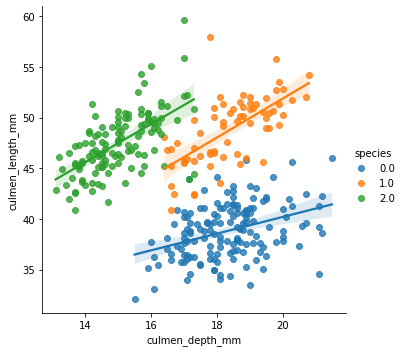

In [1017]:
random.seed(250)
penguins_adelie = penguins[penguins['species'] == 0.0].sample(n= 68)
penguins_chinstrap = penguins[penguins['species'] == 1.0].sample(n= 68)
penguins_gentoo = penguins[penguins['species'] == 2.0].sample(n= 68)
plt.rcParams.update({'figure.figsize':(16,16)})
sns.lmplot(x='culmen_depth_mm', y='culmen_length_mm', hue='species', data=penguins)

In [1018]:
# Now, I can calculate the exact correlation between culmen_depth and length

correlation_of_adelie = round(penguins_adelie['culmen_depth_mm'].corr(penguins_adelie['culmen_length_mm']),3)
correlation_of_chinstrap = round(penguins_chinstrap['culmen_depth_mm'].corr(penguins_chinstrap['culmen_length_mm']),3)
correlation_of_gentoo = round(penguins_gentoo['culmen_depth_mm'].corr(penguins_gentoo['culmen_length_mm']),3)
print(correlation_of_adelie, correlation_of_chinstrap, correlation_of_gentoo)


0.466 0.654 0.621


The correlation for **Adelia** is **0.425** which is an **avarage positive correlation**

The correlation for **Chinstrap** is **0.654** which is an **avarage positive correlation**

The correlation for **Adelia** is **0.636** which is **an avarage positive correlation**

Therefore, there is an **avarage positive correlation** between **culmen_dep and length for all species**

In [1019]:
# from all data with combining the species, the correlation should decrease, but remain positive
# let us see what we'll see

penguins_species = pd.concat([penguins_adelie, penguins_chinstrap, penguins_gentoo])
all_corr = round(penguins_species['culmen_depth_mm'].corr(penguins_species['culmen_length_mm']),3)
print(all_corr)

-0.034


The **exact correlation** is **-0.04** which is **negative weak correlation.** So, the correlation I found earlier between  **culmen_dep and length for each species** could be **misleading.**

## Flipper Length Over Each Islands

In [1020]:
print(penguins.value_counts(subset=penguins['island']))

island
1.0    168
2.0    124
0.0     52
dtype: int64


In [1021]:
# we have to balance the data,then concanate the random chosen penguins from each island
# I took n= 52 because 52 is the smallest value

penguins_torgersen = penguins[penguins['island'] == 0.0].sample(n= 52)
penguins_biscoe = penguins[penguins['island'] == 1.0].sample(n= 52)
penguins_dream = penguins[penguins['island'] == 2.0].sample(n= 52)
penguins_island = pd.concat([penguins_torgersen, penguins_biscoe, penguins_dream])


print(penguins_torgersen['flipper_length_mm'].mean())
print(penguins_biscoe['flipper_length_mm'].mean())
print(penguins_dream['flipper_length_mm'].mean())
print(penguins_island['flipper_length_mm'].mean())

191.38298470535312
209.09615384615384
192.32692307692307
197.60202054281004


As can be seen from the mean values of flipper lengths of the penguins from each island, **Biscoe island** have the **largest average flipper length**

## The relation between Sex and Flipper Length & Body Mass

In [1022]:
print(penguins.value_counts(subset=penguins['sex']))
# 0.0 represents Males
# 1.0 represents Females


sex
0.0    179
1.0    165
dtype: int64


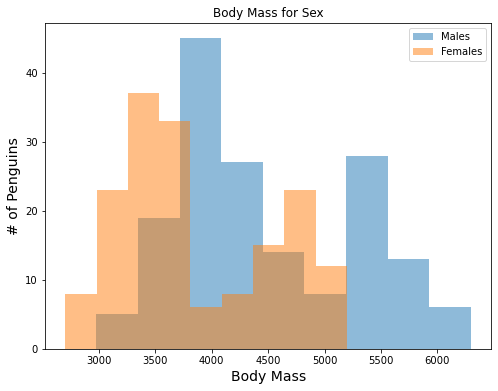

In [1023]:
penguins_males = penguins[penguins['sex'] == 0.0].sample(n= 165)
penguins_females = penguins[penguins['sex'] == 1.0].sample(n= 165)
males = list(penguins_males['body_mass_g'])
females = list(penguins_females['body_mass_g'])
plt.figure(figsize=(8,6))
plt.hist(males, bins=9, alpha=0.5, label="Males")
plt.hist(females, bins=9, alpha=0.5, label="Females")
plt.xlabel("Body Mass", size=14)
plt.ylabel("# of Penguins", size=14)
plt.title("Body Mass for Sex")
plt.legend(loc='upper right')
plt.show()

In [1024]:
body_mass_mean_male = penguins_males['body_mass_g'].mean()
body_mass_mean_female = penguins_females['body_mass_g'].mean()
print(body_mass_mean_male)
print(body_mass_mean_female)

4491.990962254121
3862.2727272727275


According to overlapping histogram and mean values of body masses of males and females taken from 165 samples,

**Avarage mass of males is 653 grams bigger than females.**


Also, we can examine relation between **body mass and flipper length for both sex**

In [1025]:
male_body_flipper_correlation = round(penguins_males['body_mass_g'].corr(penguins_males['flipper_length_mm']),3)
female_body_flipper_correlation = round(penguins_females['body_mass_g'].corr(penguins_females['flipper_length_mm']),3)
print(male_body_flipper_correlation) 
print(female_body_flipper_correlation)


0.867
0.885


**The correlation** between **body mass and flipper length** for **males**: **0.869**

**The correlation** between **body mass** and **flipper length** for **females**: **0.885**

These values represent **very high**, **strong positive correlations**



# The Correlation Between of Species (class variable/label)  and other Variables

**Most important part of the analysis** is where we try to find **correlation** between **species and other variables**

# Species over island

In [1026]:

pen_island = penguins['island']

print("Torgersen: ", penguins.value_counts(subset = penguins_torgersen['species']))
print('---------------------------------------------------------------')
print("Biscoe: ", penguins.value_counts(subset = penguins_biscoe['species']))
print('-------------------------------------------------------------------')
print("Dream: ", penguins.value_counts(subset = penguins_dream['species']))

Torgersen:  species
0.0    52
dtype: int64
---------------------------------------------------------------
Biscoe:  species
2.0    38
0.0    14
dtype: int64
-------------------------------------------------------------------
Dream:  species
1.0    31
0.0    21
dtype: int64


According to the speficic dataframe, **Gentoo is only living at Biscoe island**, whereas **Chinstrap is only living at Dream island**

In [1027]:
penguins.groupby('species').mean()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species                                                                   
0.0      1.026316         38.825144        18.338495         190.025758   
1.0      2.000000         48.833824        18.420588         195.823529   
2.0      1.000000         47.475983        14.999606         217.055768   

         body_mass_g       sex  
species                         
0.0      3703.958910  0.480263  
1.0      3733.088235  0.500000  
2.0      5068.965761  0.467742

In [1028]:
penguins.groupby('species').sum()


island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species                                                                 
0.0       156.0        5901.42193       2787.45117       28883.915205   
1.0       136.0        3320.70000       1252.60000       13316.000000   
2.0       124.0        5887.02193       1859.95117       26914.915205   

           body_mass_g   sex  
species                       
0.0      563001.754386  73.0  
1.0      253850.000000  34.0  
2.0      628551.754386  58.0

 # Important findings from above
 It seems like **body mass of gentoo** is **much bigger** than other two species.
 
 **Gento's flipper_length_mm** is **bigger** than other two species **by a big margin.**
 
 **Gento's culmen_depth** is **significantly smaller** than other two species
 
 **Adelie's culmen_length_mm** is **smaller** than other two species
 
 There is **no correlation** between **species and sex** variable.

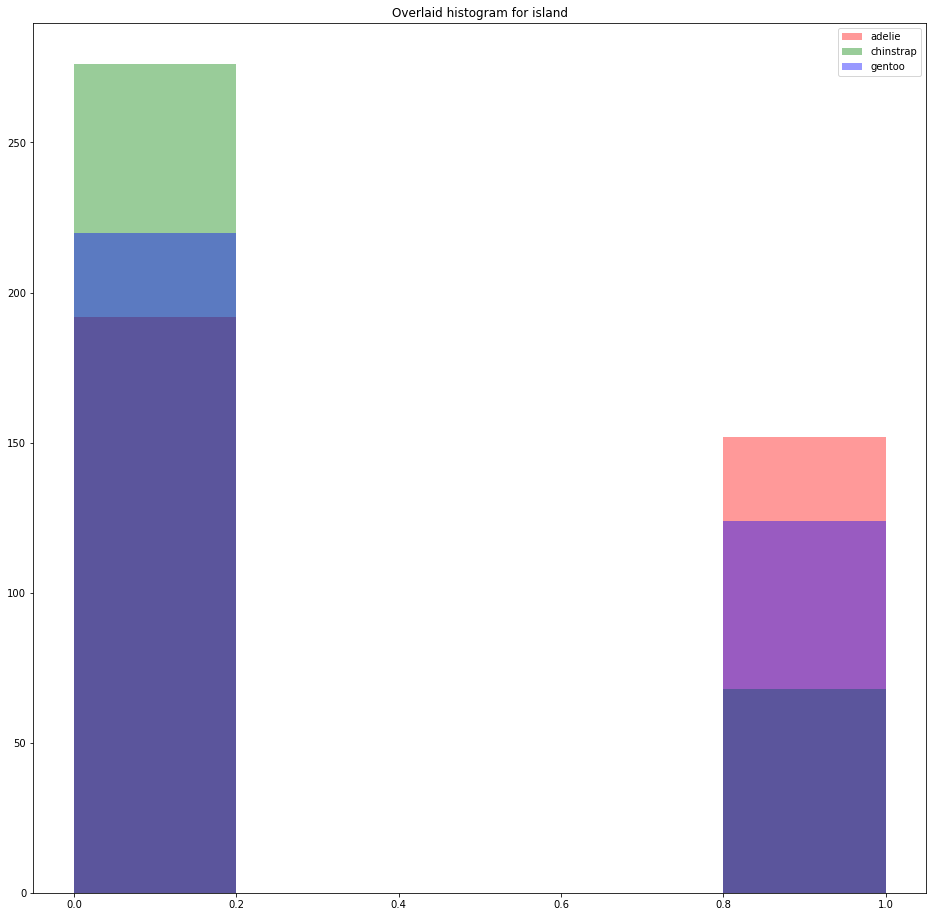

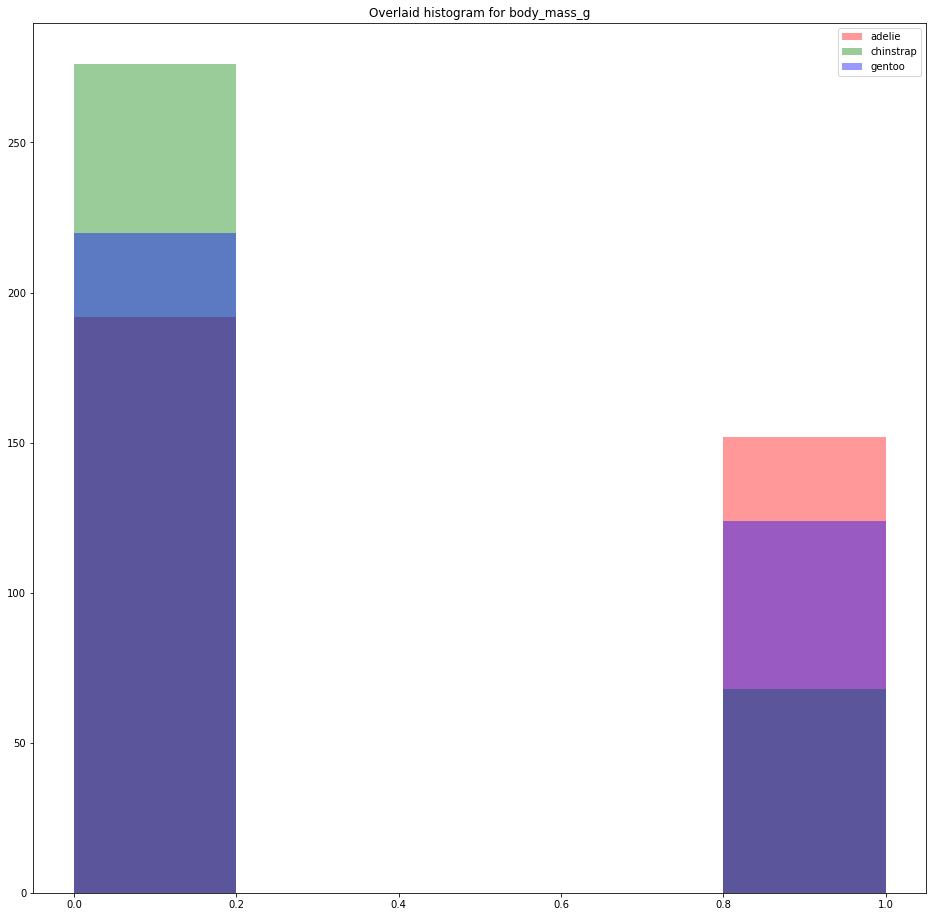

In [1029]:
for i in ['island', 'body_mass_g']:
    adelie = list(penguins['species'] == 0)
    chinstrap = list(penguins['species'] == 1)
    gentoo = list(penguins['species'] == 2)
    sns.distplot(adelie, color='r', kde=False, bins=5)
    sns.distplot(chinstrap, color='g', kde=False, bins=5)
    sns.distplot(gentoo, color='b', kde=False, bins=5)
    plt.legend(['adelie', 'chinstrap', 'gentoo'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

### Therefore, we can drop sex variable from the dataframe

In [1030]:
variable_to_drop = ['sex']
penguins.drop(variables_to_drop, axis=1, inplace=True)

In [1031]:
penguins.head()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0      0.0     0.0          39.10000         18.70000         181.000000   
1      0.0     0.0          39.50000         17.40000         186.000000   
2      0.0     0.0          40.30000         18.00000         195.000000   
3      0.0     0.0          43.92193         17.15117         200.915205   
4      0.0     0.0          36.70000         19.30000         193.000000   

   body_mass_g  
0  3750.000000  
1  3800.000000  
2  3250.000000  
3  4201.754386  
4  3450.000000

In [1032]:
penguins.to_csv('penguins_cleaned.csv', index=False)

In [1033]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

# Splitting into training, validation and test data


 ## Splitting into 60% Training / 20% Test / 20% Validation

In [1034]:
penguins = pd.read_csv('penguins_cleaned.csv')

In [1035]:
#reference used: I used the way that the Professor showed on lectures to split data into training and validation data

features = penguins.drop('species', axis=1)
labels = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [1036]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [1037]:
X_train.to_csv('train60_features.csv', index=False)
X_val.to_csv('val20_features.csv', index=False)
X_test.to_csv('test20_features.csv', index=False)

y_train.to_csv('train60_labels.csv', index=False)
y_val.to_csv('val20_labels.csv', index=False)
y_test.to_csv('test20_labels.csv', index=False)

 ## Splitting into 80% Training / 10% Test / 10% Validation

In [1038]:
#reference used: I used the way that the Professor showed on lectures to split data into training and validation data

X80_train, X10_test, y80_train, y10_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X10_test, X10_val, y10_test, y10_val = train_test_split(X10_test, y10_test, test_size=0.5, random_state=42)

In [1039]:
for dataset in [y80_train, y10_val, y10_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [1040]:
X80_train.to_csv('train80_features.csv', index=False)
X10_val.to_csv('val10_features.csv', index=False)
X10_test.to_csv('test10_features.csv', index=False)

y80_train.to_csv('train80_labels.csv', index=False)
y10_val.to_csv('val10_labels.csv', index=False)
y10_test.to_csv('test10_labels.csv', index=False)

In [1041]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

## 1- Logistic Regression with 60% Training / 20% Test / 20% Validation:

In [1042]:
def plot_learning_curve_graph(tr_features, tr_labels, classifier):
        X, y = tr_features, tr_labels
        train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, scoring="accuracy", train_sizes=np.linspace(0.01, 1.0, 50))
        np.mean(train_scores, axis=1)
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        plt.subplots(1, figsize=(10,10))
        plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
        plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
        
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show()

In [1043]:
tr_features = pd.read_csv('train60_features.csv')
tr_labels = pd.read_csv('train60_labels.csv')

In [1044]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

80-10-10
BEST PARAMS: {'C': 1}

0.874 (+/-0.063) for {'C': 0.001}
0.971 (+/-0.036) for {'C': 0.01}
0.976 (+/-0.03) for {'C': 0.1}
0.981 (+/-0.019) for {'C': 1}
0.976 (+/-0.03) for {'C': 10}
0.976 (+/-0.031) for {'C': 100}
0.971 (+/-0.036) for {'C': 1000}


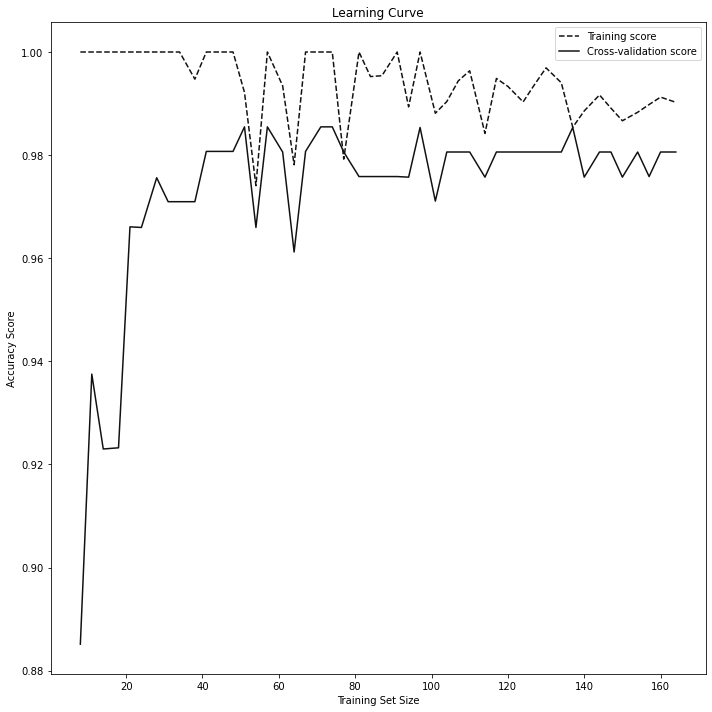

['penguins_LR60_model.pkl']

In [1045]:
# I did find optimal parameters and plot learning curve at the same time

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print(title)
print_results(cv)
plot_learning_curve_graph(tr_features, tr_labels, cv.best_estimator_)   
joblib.dump(cv.best_estimator_, 'penguins_LR60_model.pkl')


## Outcomes of finding best paremeters and learning curve for Logistic Regression with 60% Training / 20% Test / 20% Validation

## According to learning curve, and best parameters output:

- **The training score** is **1.0 or almost 1** until the **traning set size** is **between 20 and 30**
- In general, **the traning score** got **lower** when **the training set** size gets **bigger**
- In general, **Cross-validation score increases**, when the **training set** size **increases**
- **The training score is considerably high**
- **BEST PARAMS: {'C': 1}**


In [1046]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

## 1- Logistic Regression with 80% Training / 10% Test / 10% Validation:


In [1047]:
tr_features_80 = pd.read_csv('train80_features.csv')
tr_labels_80 = pd.read_csv('train80_labels.csv')

In [1048]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

80-10-10
BEST PARAMS: {'C': 1000}

0.88 (+/-0.075) for {'C': 0.001}
0.978 (+/-0.036) for {'C': 0.01}
0.975 (+/-0.029) for {'C': 0.1}
0.978 (+/-0.036) for {'C': 1}
0.971 (+/-0.049) for {'C': 10}
0.978 (+/-0.036) for {'C': 100}
0.982 (+/-0.023) for {'C': 1000}


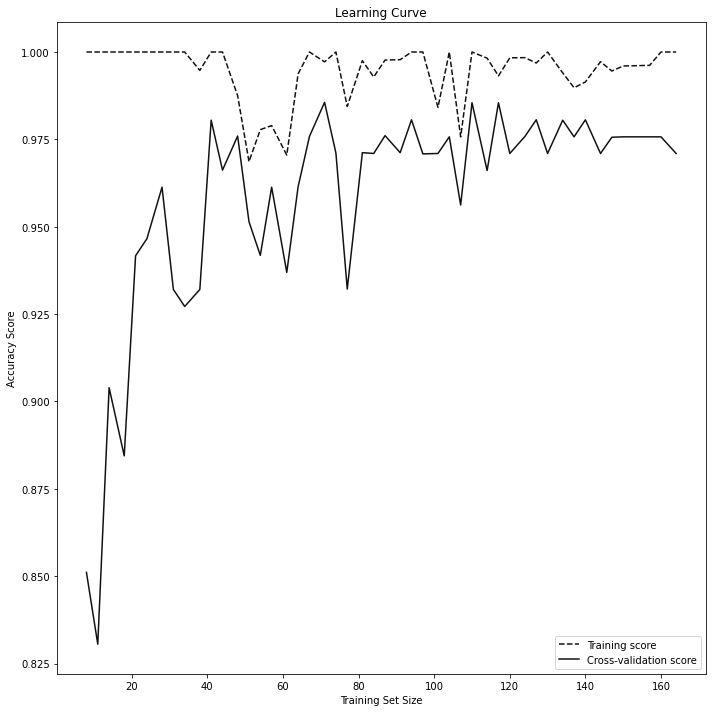

['penguins_LR80_model.pkl']

In [1049]:
# I did find optimal parameters and plot learning curve at the same time
# reference used: parameters were written in provided notebooks by Professor


lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features_80, tr_labels_80.values.ravel())

title = '80-10-10'     
print(title)
print_results(cv)
plot_learning_curve_graph(tr_features, tr_labels, cv.best_estimator_) 
joblib.dump(cv.best_estimator_, 'penguins_LR80_model.pkl')

## Outcomes of finding best paremeters and learning curve for Logistic Regression with 80% Training / 10% Test / 10% Validation

## According to learning curve, and best parameters output:

- Again, **The training score** is **1.0 or almost 1** until the **traning set size** is **between 0 and 30**
- Unlike 60-20-20 split, **the traning score** **almost stayed the same** when **the training set** size gets **bigger**
- Similary, **Cross-validation score increases**, when the **training set** size **increases**
- **The training score seems to be higher than 60-20-20 split**
- **BEST PARAMS: {'C': 1000}**

In [1050]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

## 2- Multilayer Perceptron with 60% Training / 20% Test / 20% Validation:


In [1051]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [1052]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

80-10-10
BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.369 (+/-0.164) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.365 (+/-0.164) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.315 (+/-0.17) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.31 (+/-0.178) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.388 (+/-0.214) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.339 (+/-0.253) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.399 (+/-0.321) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.461 (+/-0.146) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.325 (+/-0.131) for {'activation': 'relu', 'hidden_layer_sizes': (10

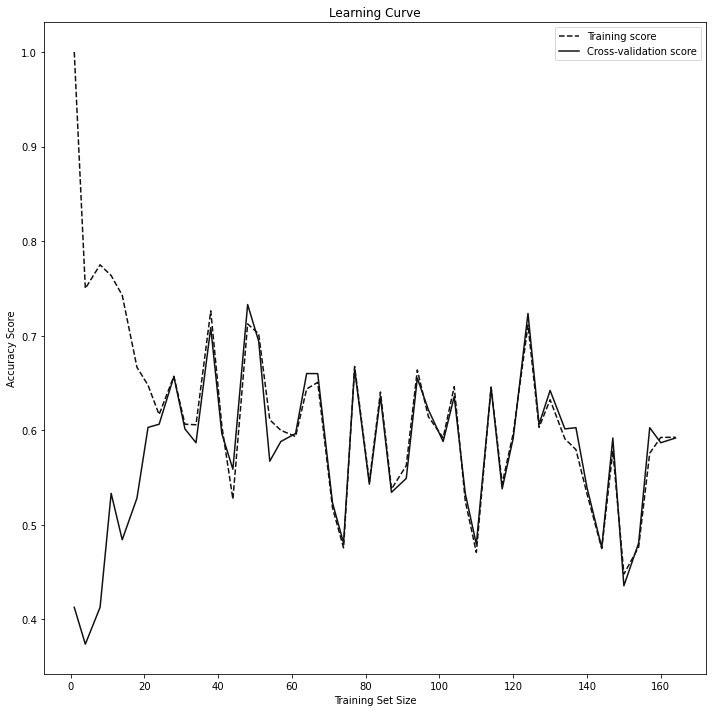

['penguins_MP60_model.pkl']

In [1053]:
# I did find optimal parameters and plot learning curve at the same time
# reference used: parameters were written in provided notebooks by Professor


mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
       
print(title)
print_results(cv)
plot_learning_curve_graph(tr_features, tr_labels, cv.best_estimator_) 
joblib.dump(cv.best_estimator_, 'penguins_MP60_model.pkl')

## Outcomes of finding best paremeters and learning curve for Multilayer Perceptron with 60% Training / 20% Test / 20% Validation:


## According to learning curve, and best parameters output:

- In general, **Cross-validation score and training score always fluactuates**
- **The training score** is **significantly low compared to Logistic Regression** since **Multilayer Perceptron requires a large amount of data** and this dataset is **not large**
- **BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}**


In [1054]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

## 2- Multilayer Perceptron with 80% Training / 10% Test / 10% Validation:

In [1055]:
tr_features_80 = pd.read_csv('train80_features.csv')
tr_labels_80 = pd.read_csv('train80_labels.csv')

In [1056]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

80-10-10 Split
BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.476 (+/-0.223) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.36 (+/-0.183) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.295 (+/-0.252) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.418 (+/-0.324) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.422 (+/-0.18) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.422 (+/-0.526) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.469 (+/-0.333) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.425 (+/-0.141) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.425 (+/-0.227) for {'activation': 'relu', 'hidden_layer_sizes'

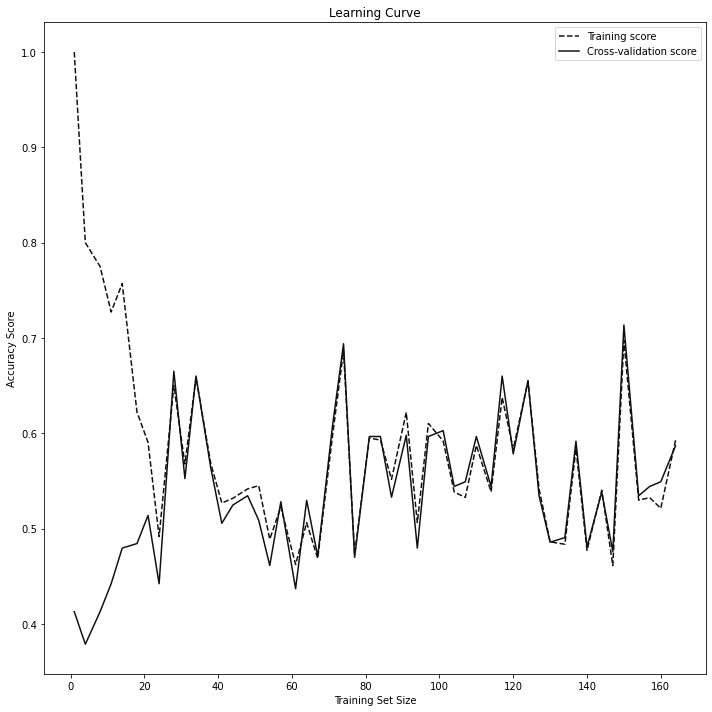

['penguins_MP80_model.pkl']

In [1057]:
# I did find optimal parameters and plot learning curve at the same time
# reference used: parameters were written in provided notebooks by Professor

mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features_80, tr_labels_80.values.ravel())
title = '80-10-10 Split'
print(title)
print_results(cv)
plot_learning_curve_graph(tr_features, tr_labels, cv.best_estimator_) 
joblib.dump(cv.best_estimator_, 'penguins_MP80_model.pkl')

## Outcomes of finding best paremeters and learning curve for Multilayer Perceptron with 80% Training / 10% Test / 10% Validation:

## According to learning curve, and best parameters output:

- Similarly, **Cross-validation score and training score always fluactuates**
- **The training score** is **significantly low compared to Logistic Regression** since **Multilayer Perceptron requires a large amount of data** and this dataset is **not large**
- **BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}**


In [1058]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

## 3- Random Forest with 60% Training / 20% Test / 20% Validation:

In [1059]:
tr_features = pd.read_csv('train60_features.csv')
tr_labels = pd.read_csv('train60_labels.csv')


In [1060]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

BEST PARAMS: {'max_depth': None, 'n_estimators': 5}

0.903 (+/-0.148) for {'max_depth': 2, 'n_estimators': 5}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 50}
0.966 (+/-0.023) for {'max_depth': 2, 'n_estimators': 250}
0.971 (+/-0.047) for {'max_depth': 4, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 250}
0.966 (+/-0.039) for {'max_depth': 8, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 250}
0.961 (+/-0.038) for {'max_depth': 16, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 250}
0.966 (+/-0.049) for {'max_depth': 32, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 32, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 32, 'n_estimators': 250}
0.995 (+/-0.019) for {'max_depth': None, 'n_estimators': 5}
0.986 (+/-0.03

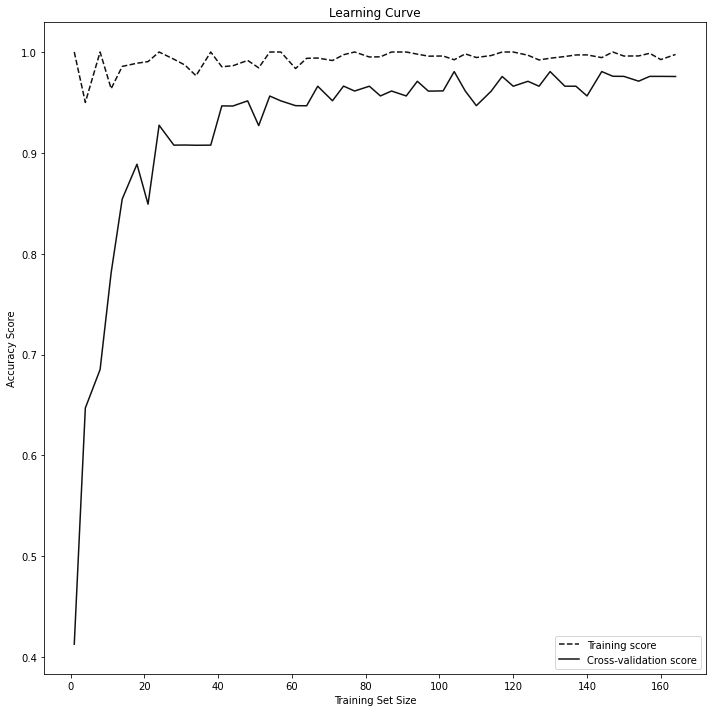

['penguins_RF60_model.pkl']

In [1061]:
# I did find optimal parameters and plot learning curve at the same time
# reference used: parameters were written in provided notebooks by Professor

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())
print_results(cv)
plot_learning_curve_graph(tr_features, tr_labels, cv.best_estimator_)
joblib.dump(cv.best_estimator_, 'penguins_RF60_model.pkl')

## Outcomes of finding best paremeters and learning curve for Random Forest with 60% Training / 20% Test / 20% Validation:


## According to learning curve, and best parameters output:

- **The training score** is **almost 1** after the **traning set size** exceeds **20**
- **The training score** can be considered as **steady**
- In general, **Cross-validation score increases**, when the **training set** size **increases**
- **The training score is considerably high like Logistic Regression**
- **BEST PARAMS: {'max_depth': 8, 'n_estimators': 5}**


In [1062]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

## 3- Random Forest with 80% Training / 10% Test / 10% Validation:

In [1063]:
tr_features_80 = pd.read_csv('train80_features.csv')
tr_labels_80 = pd.read_csv('train80_labels.csv')

In [1064]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

80-10-10
BEST PARAMS: {'max_depth': 32, 'n_estimators': 5}

0.945 (+/-0.046) for {'max_depth': 2, 'n_estimators': 5}
0.964 (+/-0.033) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 2, 'n_estimators': 250}
0.953 (+/-0.037) for {'max_depth': 4, 'n_estimators': 5}
0.975 (+/-0.029) for {'max_depth': 4, 'n_estimators': 50}
0.975 (+/-0.018) for {'max_depth': 4, 'n_estimators': 250}
0.96 (+/-0.036) for {'max_depth': 8, 'n_estimators': 5}
0.971 (+/-0.018) for {'max_depth': 8, 'n_estimators': 50}
0.975 (+/-0.018) for {'max_depth': 8, 'n_estimators': 250}
0.975 (+/-0.044) for {'max_depth': 16, 'n_estimators': 5}
0.978 (+/-0.027) for {'max_depth': 16, 'n_estimators': 50}
0.978 (+/-0.027) for {'max_depth': 16, 'n_estimators': 250}
0.982 (+/-0.023) for {'max_depth': 32, 'n_estimators': 5}
0.982 (+/-0.033) for {'max_depth': 32, 'n_estimators': 50}
0.978 (+/-0.027) for {'max_depth': 32, 'n_estimators': 250}
0.956 (+/-0.029) for {'max_depth': None, 'n_estimators': 5}
0.978

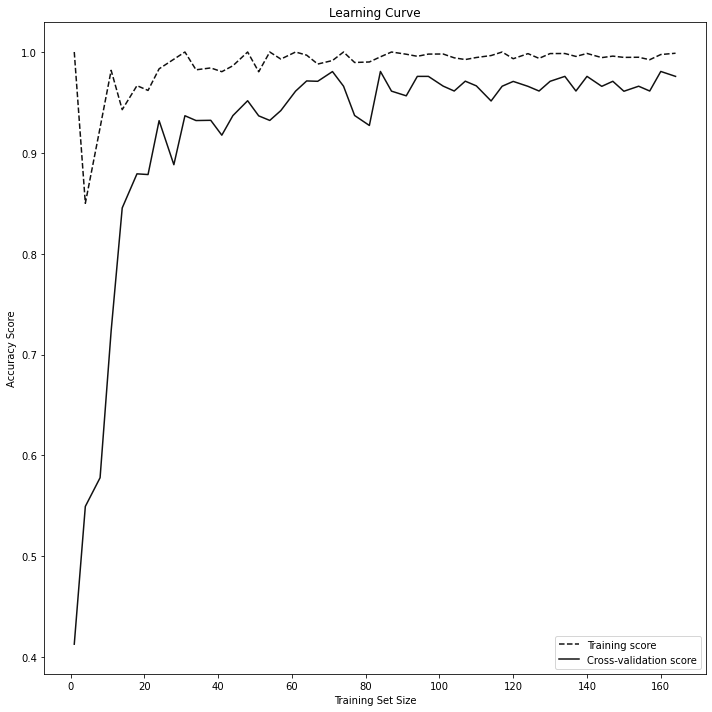

['penguins_RF80_model.pkl']

In [1065]:
# I did find optimal parameters and plot learning curve at the same time
# reference used: parameters were written in provided notebooks by Professor

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features_80, tr_labels_80.values.ravel())

title = '80-10-10'
print(title)
print_results(cv)
plot_learning_curve_graph(tr_features, tr_labels, cv.best_estimator_)
joblib.dump(cv.best_estimator_, 'penguins_RF80_model.pkl')

## Outcomes of finding best paremeters and learning curve for Random Forest with 80% Training / 10% Test /10% Validation:


## According to learning curve, and best parameters output:

- **The training score** is always **1**
- **The training score** remains **the same**
- In general, **Cross-validation score increases**, when the **training set** size **increases**
- **The training score is considerably high like Logistic Regression**
- **BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}**

In [1066]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

# Evaluate models on the Validation and Test set

In [1067]:
val20_features = pd.read_csv('val20_features.csv')
val20_labels = pd.read_csv('val20_labels.csv')
te20_features = pd.read_csv('test20_features.csv')
te20_labels = pd.read_csv('test20_labels.csv')
# -----------------------------------------------------
val10_features = pd.read_csv('val10_features.csv')
val10_labels = pd.read_csv('val10_labels.csv')
te10_features = pd.read_csv('test10_features.csv')
te10_labels = pd.read_csv('test10_labels.csv')

In [1068]:
# reference used: this function was used in lecture and written in provided notebooks by Professor
# Models based on 60-20-20 split
models60 = {}

for mdl in ['LR60','MP60', 'RF60']:
    models60[mdl] = joblib.load('penguins_{}_model.pkl'.format(mdl))
# ----------------------------------------------------------------------------------- 
# Models based on 80-10-10 split
models80 = {}

for mdl in ['LR80','MP80', 'RF80']:
    models80[mdl] = joblib.load('penguins_{}_model.pkl'.format(mdl))

In [1069]:
models60

{'LR60': LogisticRegression(C=1),
 'MP60': MLPClassifier(activation='logistic'),
 'RF60': RandomForestClassifier(n_estimators=5)}

In [1070]:
models80

{'LR80': LogisticRegression(C=1000),
 'MP80': MLPClassifier(activation='logistic', hidden_layer_sizes=(50,),
               learning_rate='adaptive'),
 'RF80': RandomForestClassifier(max_depth=32, n_estimators=5)}

### Evaluate models on the validation set

In [1071]:
# reference used: this function was used in lecture and written in provided notebooks by Professor

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average="micro"), 3)
    recall = round(recall_score(labels, pred, average="micro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [1072]:
# reference used: this function was used in lecture and written in provided notebooks by Professor
# outputting performance of models that were splitted 60-20-20 based on validation set

for name, mdl in models60.items():
    evaluate_model(name, mdl, val20_features, val20_labels)

LR60 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.6ms
MP60 -- Accuracy: 0.464 / Precision: 0.464 / Recall: 0.464 / Latency: 0.6ms
RF60 -- Accuracy: 0.971 / Precision: 0.971 / Recall: 0.971 / Latency: 0.9ms


In [1073]:
# outputting performance of models that were splitted 80-10-10 based on validation set

for name, mdl in models80.items():
    evaluate_model(name, mdl, val10_features, val10_labels)

LR80 -- Accuracy: 0.971 / Precision: 0.971 / Recall: 0.971 / Latency: 0.5ms
MP80 -- Accuracy: 0.714 / Precision: 0.714 / Recall: 0.714 / Latency: 0.7ms
RF80 -- Accuracy: 0.943 / Precision: 0.943 / Recall: 0.943 / Latency: 1.1ms


### Evaluate models on the test set

In [1074]:
# outputting performance of models that were splitted 80-10-10 based on test set

for name, mdl in models80.items():
    evaluate_model(name, mdl, te10_features, te10_labels)

LR80 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.5ms
MP80 -- Accuracy: 0.588 / Precision: 0.588 / Recall: 0.588 / Latency: 0.6ms
RF80 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


In [1075]:
# outputting performance of models that were splitted 60-20-20 based on test set

for name, mdl in models60.items():
    evaluate_model(name, mdl, te20_features, te20_labels)

LR60 -- Accuracy: 0.971 / Precision: 0.971 / Recall: 0.971 / Latency: 0.5ms
MP60 -- Accuracy: 0.464 / Precision: 0.464 / Recall: 0.464 / Latency: 0.9ms
RF60 -- Accuracy: 0.957 / Precision: 0.957 / Recall: 0.957 / Latency: 1.0ms


# Analyzing the results on Validation and Test set

- Both **Logistic Regression** and **Random Forest** performed **best.** Because the **performance of Logistic Regression and Random Forest** on a **small to medium size dataset** is **quite good** **compared to** that of **Multilayer Perception.** All analysis and evulation I have done is sort of **quick benchmark model** in which **Logistic and Random Forest** are **far better** than **Multilayer Perception.**

- **One of the best performers were Logistic Regression** with **60-20-20 split on the validation** set as well as **80-10-10 split on test set.** In both case, **accuracy, precision** and **recall** were **1.0.** However, the performance of **Logistic Regression** **dropped to 0,971** while evaluation on **validation set** with **80-10-10 split** as well as **test set** with **60-20-20 split.**

- **Multilayer Perception** did **perform worse** than Logistic Regression and Random Forest on **both evulations on validation and test sets.** The reason is that **Multilayer Perception requires a large dataset** which is **not** the case for this dataset. This dataset is quite small for ML.

- **Multilayer Perception** performed **best** on **validation set** with **80-10-10 split** (0.743).

- **Random Forest** performed **best** on **validation set** with **60-20-20 split** and **test set on 80-10-10 split** in which it had **1.0 accuracy, precision and recall** values. However, the **performance of Random forest** **decreased** on **validation set** with **80-10-10** split and **test set** with **60-20-20** split which were both 0.971
- On **the test set evaluations**, **80-10-10 split** performed **better** compared to **60-20-20 split** on test set. 